<h1>Introduction to line of sight integration of arbitrary functions</h1>

<h3>first execution of import los will take some time because everything is compiled</h3>

In [1]:
import los
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<h3>The los package as of now (June 2024) consists of 4 basic files:<br>
    - los.py: basic definition of the object class<br>
    - density_functions.py: general functions (accelerated with numba) that match the classes in los.py<br>
    - num_los_setup.py: standard numerical integration setup; can be changed with keywords<br>
    - utils.py: some utilities needed for the computation<br><br>
    
NB: Some functions, classes, and utilities may not work as intended, yet!<br><br>
    
I will show some of the functionalities of the los package:</h3>

<h3>The standard way how this package works is to create an object that holds all the information. Here, I will work, first, with an Navarro Frenk White (NFW) profile that is typically used for dark matter studies. Then, I will use the Main Belt Asteroids (MBA) to show things on a Solar System scale.<br>
    The line of sight integration in general is explained in this paper: <a href>https://arxiv.org/pdf/2310.08135</a> Sec. 4.1. Read this section to understand the math and words that are used here.</h3>

In [68]:
# definition of nfw object: use n=1 for dark matter decay
# we use the Galactic frame for this, since the source is in the Galactic centre
nfw = los.NFW_Halo_Milky_Way(n=1,frame='G')

<h3>The nfw object now holds all the information that we might access at some point. If we want to do the line of sight integration, we do:</h3>

In [69]:
nfw.los_source()

<h3>Depending on your computer, this might take a while (see later); now we can plot the source:</h3>

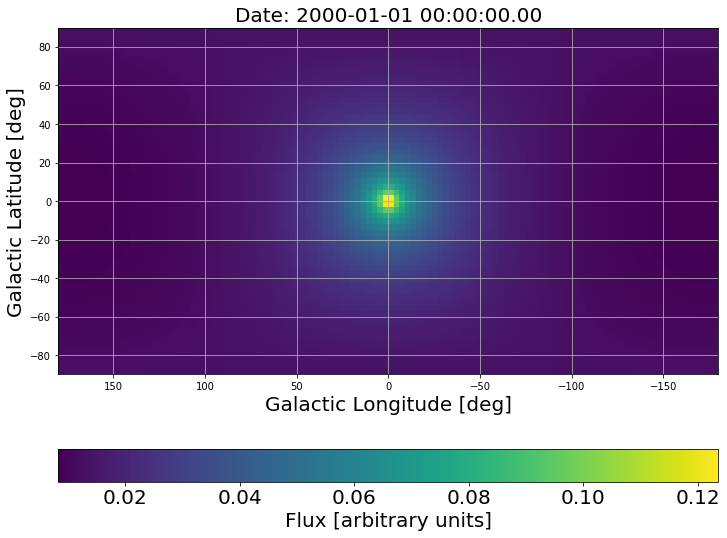

In [70]:
nfw.plot_source()

<h3>We get automatically the image of the source, with fluxes (here plotted as arbitrary units, but that can be changed). Also automatically, there is a date in the image title, because some sources might depend on time (this one doesn't). We can also change the projection of the plot:</h3>

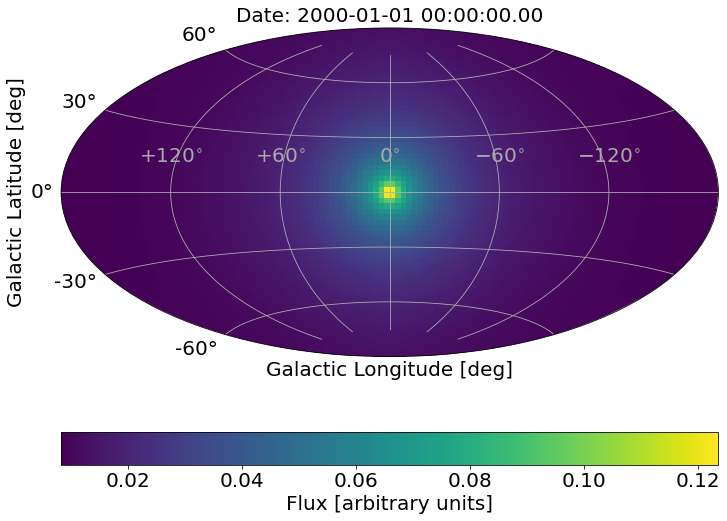

In [71]:
nfw.plot_source(projection='aitoff')

<h3>We can also check what the 'flux' is in this image:</h3>

In [72]:
nfw.flux

0.2189339543876859

<h3>Likewise, we can get the luminosity by first calculating the 'luminosity' integral:</h3>

In [73]:
nfw.luminosity_source()

In [74]:
nfw.luminosity

572.9516338264341

<h3>We also have properties of certain source, we we define in the code. Here, we have the 'D-Factor' of the density profile:</h3>

In [75]:
nfw.D_factor

<Quantity 2.56477312e+22 GeV / cm2>

<h3>Now this thing has units attached to it, because we actually calculated them in the code!</h3>

<h3>In principle, we can convert the image from Galactic coordiantes to ecliptic coordinate (for plotting purposes or because calculations in either reference frame are easier:</h3>

In [10]:
nfw.trafo_image_GAL2EC()

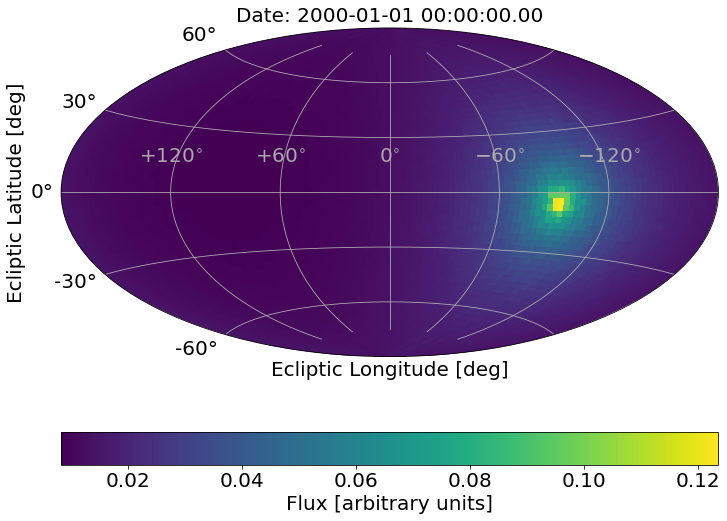

In [11]:
nfw.plot_source(projection='aitoff')

<h3>This is where the Galactic centre would be seen from the plane of the Solar System. We are observing from the position of the Sun!</h3>

<h3>Back transformation:</h3>

In [12]:
nfw.trafo_image_EC2GAL()

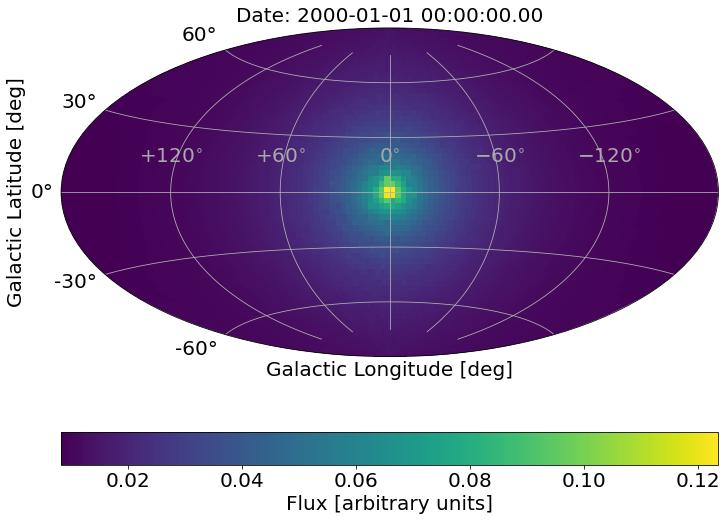

In [13]:
nfw.plot_source(projection='aitoff')

<h3>And we get back the initial image, but with slight artefacts due to the interpolation required when rotating the coordinate system. To avoid this (to some extent), we can also calculate a finer pixel grid:</h3>

In [14]:
nfw = los.NFW_Halo_Milky_Way(n=1,frame='G',pixelsize=1)

In [15]:
nfw.los_source()

<h3>Now this should take about 10 times as long as before, because we switched from 3 deg to 1 deg pixels:</h3>

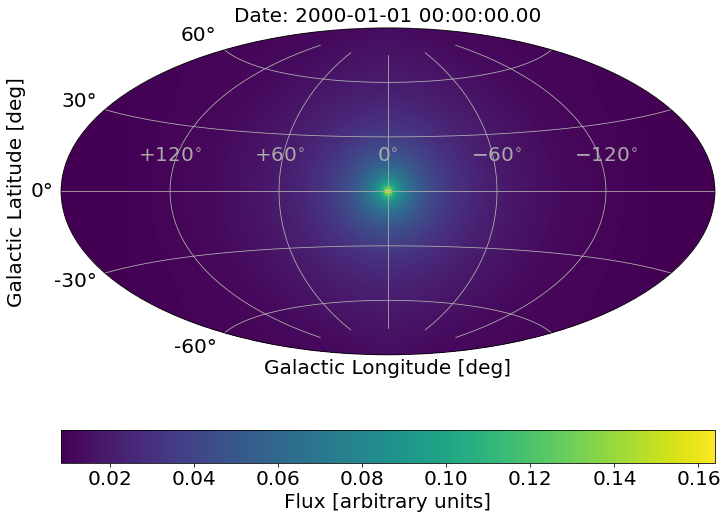

In [16]:
nfw.plot_source(projection='aitoff')

In [17]:
nfw.trafo_image_GAL2EC()

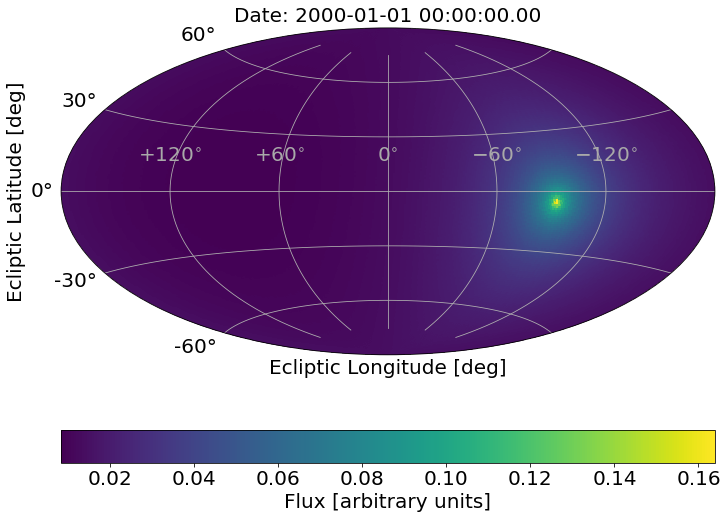

In [18]:
nfw.plot_source(projection='aitoff')

In [19]:
nfw.trafo_image_EC2GAL()

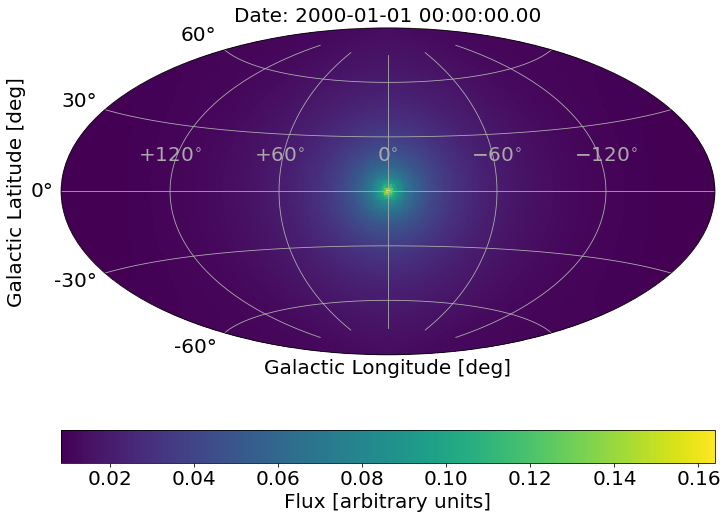

In [20]:
nfw.plot_source(projection='aitoff')

<h3>Now the artefacts are not as severe, but keep in mind that switching back and forth is not useful (should only be done once!)</h3>

<h3>For faster calculation, e.g. for testing, one could set the pixel size to 5 or 10 degrees.<br>Let's use 3 deg again (default value):</h3>

In [21]:
nfw = los.NFW_Halo_Milky_Way(n=1,frame='G')

In [22]:
nfw.los_source()

<h3>We can calculate the flux in certain regions in the sky, either within a circle, or within a rectangle:<br><br>Here, we use, first, a region around the Galactic centre, and increase the radius of the circular region by 5 deg steps:</h3>

In [23]:
phi_center = 0.
theta_center = 0.
radii = np.linspace(5,180,int(180/5))
#radii
fluxes = np.zeros(len(radii))
for i in range(len(radii)):
    fluxes[i] = nfw.flux_in_circular_region(phi_center=phi_center,
                                            theta_center=theta_center,
                                            radius=radii[i])

(0.0, 0.2408273498264545)

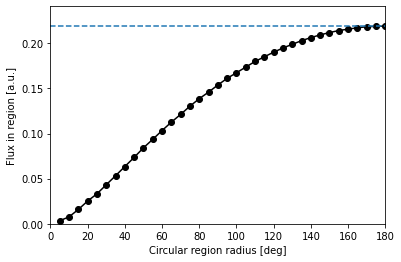

In [24]:
plt.plot(radii,fluxes,'ko-')
plt.axhline(nfw.flux,linestyle='--')
plt.xlabel('Circular region radius [deg]')
plt.ylabel('Flux in region [a.u.]')
plt.xlim(0,180)
plt.ylim(0,nfw.flux*1.1)

<h3>We can, of course, also calculate this for an arbitrary position (as will be needed for many purposes):</h3>

In [25]:
phi_center2 = 50.
theta_center2 = -30.
fluxes2 = np.zeros(len(radii))
for i in range(len(radii)):
    fluxes2[i] = nfw.flux_in_circular_region(phi_center=phi_center2,
                                             theta_center=theta_center2,
                                             radius=radii[i])

(0.0, 0.05)

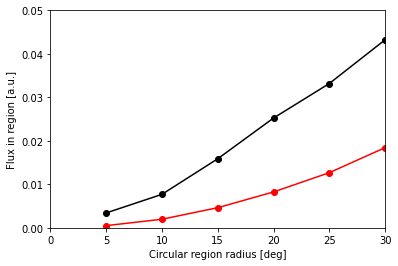

In [26]:
plt.plot(radii,fluxes,'ko-')
plt.plot(radii,fluxes2,'ro-')
plt.xlabel('Circular region radius [deg]')
plt.ylabel('Flux in region [a.u.]')
plt.xlim(0,30)
plt.ylim(0,0.05)

<h3>Clearly, there is much more flux in the Galactic centre region than in any place in the image...</h3>

<h2>More details:</h2>
<h3>The NFW_Halo_Milky_Way function is actually a wrapper around the more general Double_Powerlaw_Halo_Profile, but with certain parameters fixed:</h3>

In [27]:
nfw_actually = los.Double_Powerlaw_Halo_Profile(xT=8.179,
                                                yT=0,
                                                zT=0.019,
                                                alpha=1,
                                                beta=3,
                                                gamma=1,
                                                R0=20.,
                                                rho_dm=0.01069,
                                                n=1,
                                                smin=0,smax=50,n_los_steps=1000,
                                                pixelsize=3.0,
                                                frame='G',
                                                observer=10)

In [28]:
nfw_actually.los_source()

<h3>We can also access the image directly: with the _ in front of a variable, it is actually set as "private", i.e. hidden from the user:</h3>

In [29]:
nfw._image

array([[0.01304872, 0.01304929, 0.01305044, ..., 0.01305044, 0.01304929,
        0.01304872],
       [0.01264395, 0.01264555, 0.01264877, ..., 0.01264877, 0.01264555,
        0.01264395],
       [0.01226778, 0.01227028, 0.01227528, ..., 0.01227528, 0.01227028,
        0.01226778],
       ...,
       [0.01230007, 0.01230258, 0.01230761, ..., 0.01230761, 0.01230258,
        0.01230007],
       [0.01267868, 0.0126803 , 0.01268353, ..., 0.01268353, 0.0126803 ,
        0.01267868],
       [0.01308611, 0.01308669, 0.01308784, ..., 0.01308784, 0.01308669,
        0.01308611]])

In [30]:
nfw_actually._image

array([[0.01304872, 0.01304929, 0.01305044, ..., 0.01305044, 0.01304929,
        0.01304872],
       [0.01264395, 0.01264555, 0.01264877, ..., 0.01264877, 0.01264555,
        0.01264395],
       [0.01226778, 0.01227028, 0.01227528, ..., 0.01227528, 0.01227028,
        0.01226778],
       ...,
       [0.01230007, 0.01230258, 0.01230761, ..., 0.01230761, 0.01230258,
        0.01230007],
       [0.01267868, 0.0126803 , 0.01268353, ..., 0.01268353, 0.0126803 ,
        0.01267868],
       [0.01308611, 0.01308669, 0.01308784, ..., 0.01308784, 0.01308669,
        0.01308611]])

<h3>We see that all the values are identical.</h3>

<h3>We also have more flexibility in the numerical integration setup here, where smin and smax are the integration limits (smin should always be zero), and n_los_steps is number of $\Delta s$ values from smin to smax. We test how accurate the total flux gets by changing the n_los_steps:<br>
(NB: The maximum value smax is chosen so that it actually represents "infinity" in the calculation, see below)</h3>

In [31]:
n_los_steps = np.array([10,100,1000,10000])
flux_steps = np.zeros(4)
for i in range(4):
    tmp = los.Double_Powerlaw_Halo_Profile(xT=8.179,
                                           yT=0,
                                           zT=0.019,
                                           alpha=1,
                                           beta=3,
                                           gamma=1,
                                           R0=20.,
                                           rho_dm=0.01069,
                                           n=1,
                                           smin=0,smax=50,n_los_steps=n_los_steps[i],
                                           pixelsize=3.0,
                                           frame='G',
                                           observer=10)
    tmp.los_source()
    flux_steps[i] = tmp.flux

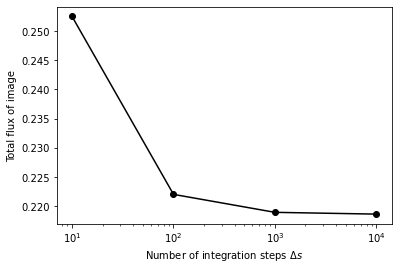

In [32]:
plt.plot(n_los_steps,flux_steps,'ko-')
plt.xlabel(r'Number of integration steps $\Delta s$')
plt.ylabel('Total flux of image')
plt.xscale('log')

<h3>You might run out of memory doing that...<br>
    Likewise, if you decrease the pixel size, you also get a more 'accurate' integral:</h3>

In [33]:
pixelsizes = np.array([10,5,3,1])
flux_pixels = np.zeros(4)
for i in range(4):
    tmp = los.Double_Powerlaw_Halo_Profile(xT=8.179,
                                           yT=0,
                                           zT=0.019,
                                           alpha=1,
                                           beta=3,
                                           gamma=1,
                                           R0=20.,
                                           rho_dm=0.01069,
                                           n=1,
                                           smin=0,smax=50,n_los_steps=1000,
                                           pixelsize=pixelsizes[i],
                                           frame='G',
                                           observer=10)
    tmp.los_source()
    flux_pixels[i] = tmp.flux

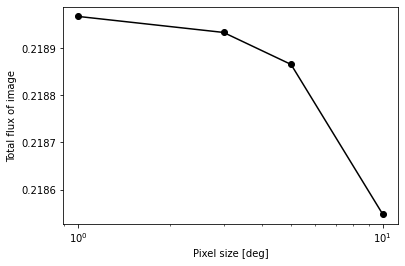

In [34]:
plt.plot(pixelsizes,flux_pixels,'ko-')
plt.xlabel(r'Pixel size [deg]')
plt.ylabel('Total flux of image')
plt.xscale('log')

<h3>And changing smax; note that the Galactic centre is 8.2 kpc away from the observer, so that even twice that value is not including the entire Galaxy:</h3>

In [35]:
smaxs = np.array([1,3,5,8.2,16.4,24.6,50,100,200,500,1000])
flux_smaxs = np.zeros(11)
for i in range(11):
    tmp = los.Double_Powerlaw_Halo_Profile(xT=8.179,
                                           yT=0,
                                           zT=0.019,
                                           alpha=1,
                                           beta=3,
                                           gamma=1,
                                           R0=20.,
                                           rho_dm=0.01069,
                                           n=1,
                                           smin=0,smax=smaxs[i],n_los_steps=1000,
                                           pixelsize=3.0,
                                           frame='G',
                                           observer=10)
    tmp.los_source()
    flux_smaxs[i] = tmp.flux

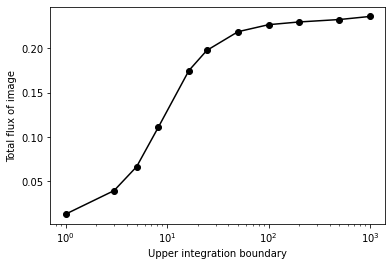

In [36]:
plt.plot(smaxs,flux_smaxs,'ko-')
plt.xlabel(r'Upper integration boundary')
plt.ylabel('Total flux of image')
plt.xscale('log')

<h3>Note that when increasing the n_los_steps, the interval $\Delta s$ was actually not increased! This can lead to erroneous integrations.</h3>

<h2>Now we check the Main Belt Asteroids:</h2>

In [37]:
mba = los.Main_Belt_Asteroids()

In [38]:
mba.los_source()

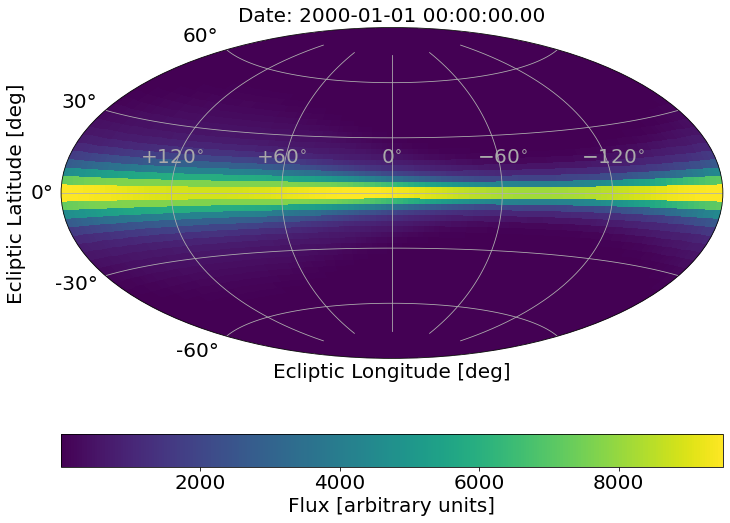

In [39]:
mba.plot_source(projection='aitoff')

<h3>By default, the date is set to 2000-01-01, pixelsize = 3, and observer = Earth, for the case of Solar System objects. Let's change a few things:</h3>

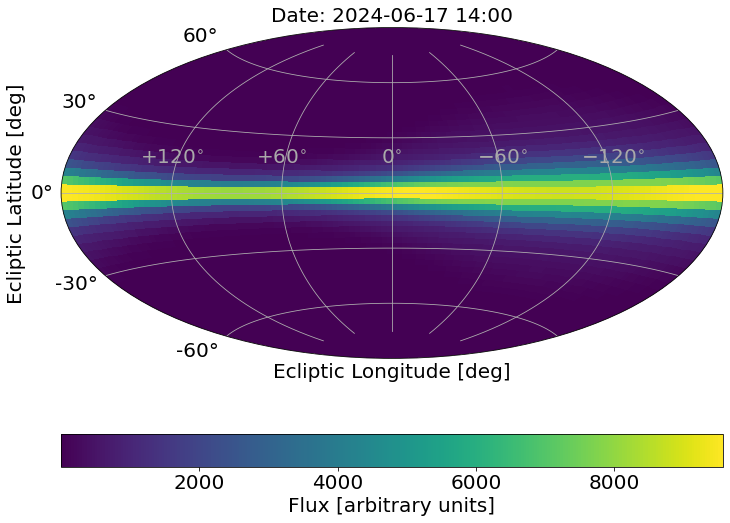

In [40]:
mba = los.Main_Belt_Asteroids(time='2024-06-17 14:00')
mba.los_source()
mba.plot_source(projection='aitoff')

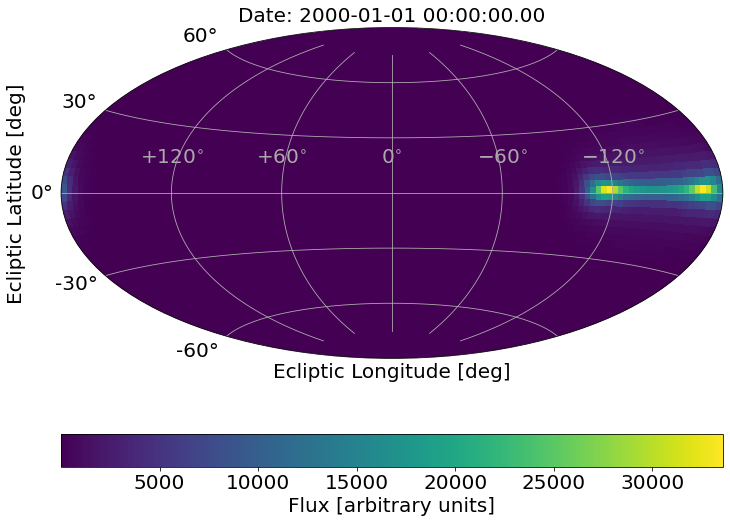

In [41]:
mba = los.Main_Belt_Asteroids(observer='599')
mba.los_source()
mba.plot_source(projection='aitoff')

<h3>Here we are observing the Main Belt Asteroids from the Position of Jupiter (599). Look up in JPL Horizons for the IDs of objects from which we can observe:</h3>

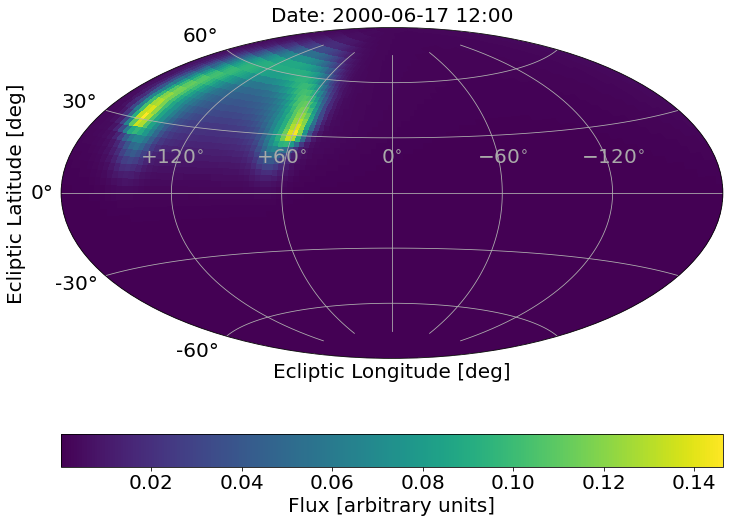

In [42]:
kbo = los.Kuiper_Belt(observer='Voyager 2',smin=0,smax=1000,n_los_steps=1000,pixelsize=3,time='2000-06-17 12:00')
kbo.los_source()
kbo.plot_source(projection='aitoff')

<h3>Or the Kuiper Belt Object from the position of Voyager 2 in the year 2000 ...</h3>

<h3>Back to the Main Belt</h3>

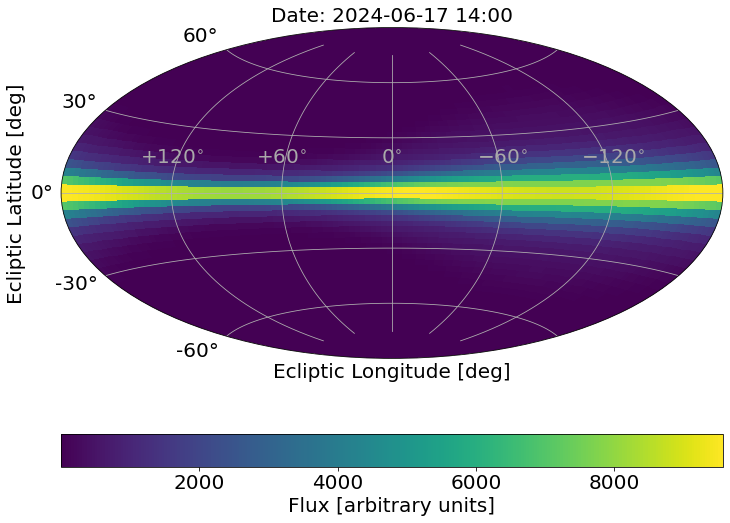

In [43]:
mba = los.Main_Belt_Asteroids(time='2024-06-17 14:00')
mba.los_source()
mba.plot_source(projection='aitoff')

In [44]:
mba.trafo_image_EC2GAL()

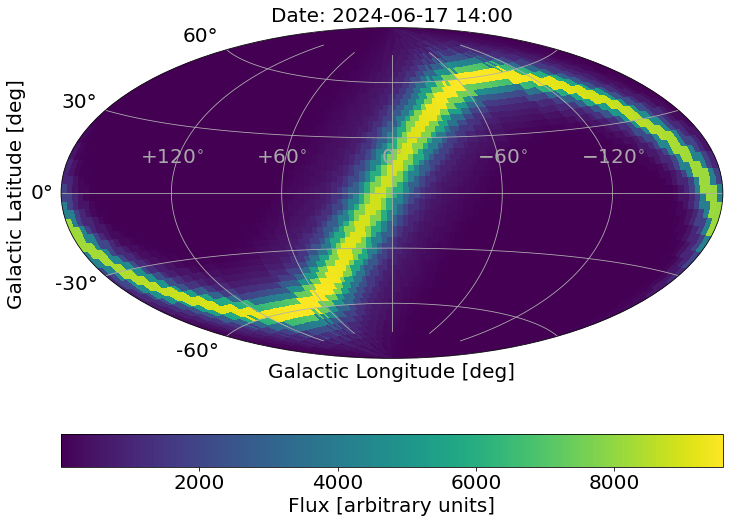

In [45]:
mba.plot_source(projection='aitoff')

In [46]:
mba.flux,mba.luminosity

(17289.409728994036, 1223921.1293725413)

In [47]:
mba.normalise_by_flux(1234.)

In [48]:
mba.flux,mba.luminosity

(1234.0, 87355.13226417084)

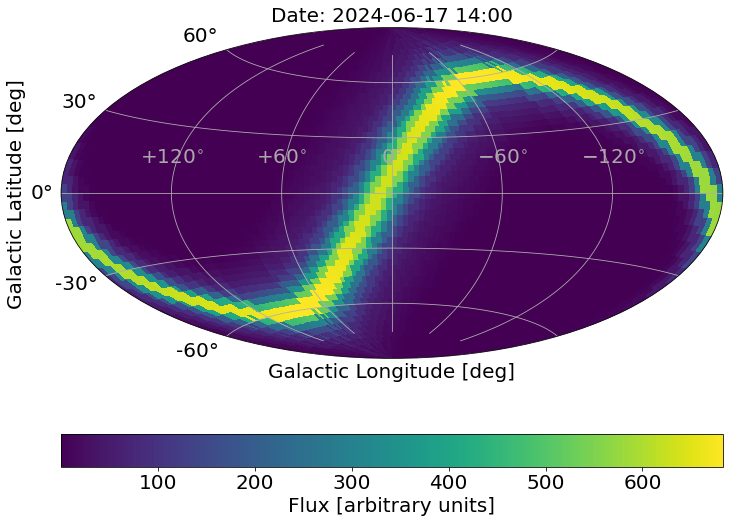

In [49]:
mba.plot_source(projection='aitoff')

<h2>General object with many things to change ...:</h2><br>
<h3>Here: A spherical shell with a Gaussian density:</h3>

In [50]:
# xT, yT, zT = 100, 0, 0 # central position of the shell
# RT, sigmaT = 50, 10 # radius of shell, width of shell
# rho0 = 1 # density (no unit attached)
#
# since distance is 100, radius 50 and width 10,
# an smax of 200 is probably sufficient for the numerical integration
# 1000 steps are ds = (200-0)/1000 = 0.2
# the frame is Galactic
# the observer is "the Sun" = '10'


sph = los.Spherical_Shell_Gaussian(xT=100,yT=0,zT=0,
                                   RT=50,sigmaT=10,
                                   rho0=1,
                                   smin=0,smax=200,n_los_step=1000,
                                   frame='G',
                                   observer='10')

In [51]:
sph.los_source()

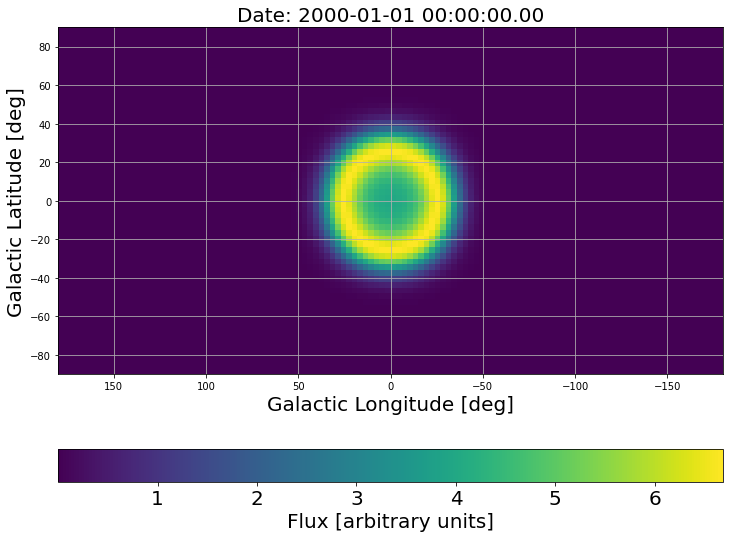

In [52]:
sph.plot_source()

<h3>If we change the smax value to only 50, we are actually making a mistake here! We are only integrating until 50, so that we only have a quarter of the object...</h3>

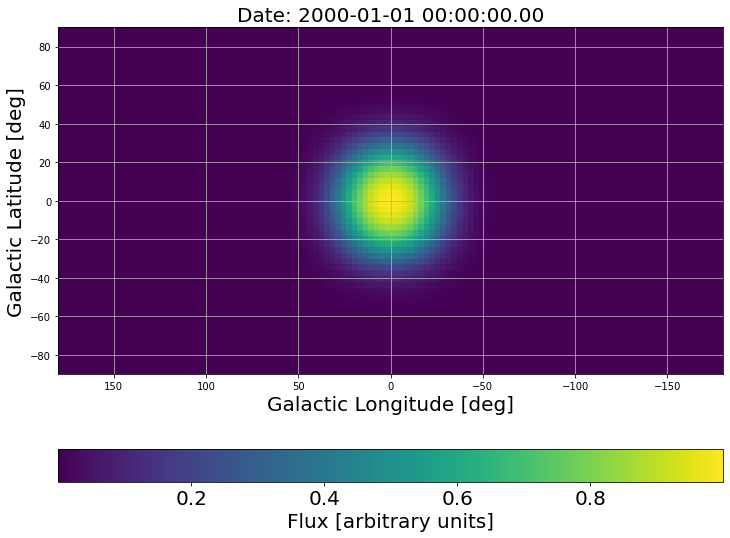

In [53]:
sph_wrong = los.Spherical_Shell_Gaussian(xT=100,yT=0,zT=0,
                                   RT=50,sigmaT=10,
                                   rho0=1,
                                   smin=0,smax=50,n_los_step=1000,
                                   frame='G',
                                   observer='10')
sph_wrong.los_source()
sph_wrong.plot_source()

<h3>It looks not even similar, because we cut the integration inside of the Gaussian...<br>
    If you create your own models, take care of these issues when doing a general model (instead of a named one, where we set the "optimal" numerical integration setup.</h3>

<h2>Creating your own model:</h2>
<h3>For your own model, there are different ways to test, but only one way to implement:<br>
    We test the model either in a notebook like this, or we call it from a python function, etc.<br>
    In any case, it is useful to use the jupyter notebook "magic" to always re-compile when an outside function changed. In this way, we don't always have to restart the kernel. We use:</h3>

In [54]:
%reload_ext autoreload
%autoreload 2

<h3>Every time we change something in the four above-mentioned files, we are compiling the functions. This might then take a little while every time, but is still faster than restarting the kernel.<br>
    Suppose we want to build a model of the form<br>
    $\rho(x,y,z;\rho_0,R_e) = \rho_0 \exp\left(- \frac{R}{R_e}\right)$<br>
    with $R^2 = (x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2$, have to define two functions in the two files los.py and density_funtions.py. The function in the los.py <i>MUST</i> always have the same form:</h3>

In [55]:
from los import los
# note that the above things in the notebook will not work anymore in the same way,
# now that we defined los.
from num_los_setup import num_los_setup
# instead, we have the functions included when we import them:

In [56]:
class New_Function(los):
    """
    Explanation of the New Function.
    Input parameters:
    xT: x-coordinate of centre ...
    yT: y-coordinate of centre ...
    zT: z-coordinate of centre ...
    Re: Scale radius of exponential ...
    rho0: normalisation (so far unitless)

    """

    def __init__(self,**kwargs):
        
        super().__init__(**kwargs)
        
        self.name = 'New_Function'

        self.nls = num_los_setup(smin=self._smin,
                                 smax=self._smax,
                                 n_los_steps=self._n_los_steps,
                                 lmin=self._phi_min,
                                 lmax=self._phi_max,
                                 bmin=self._theta_min,
                                 bmax=self._theta_max,
                                 pixelsize=self._pixelsize)

        
        Re = kwargs.pop('Re')
        
        xT = kwargs.pop('xT')
        yT = kwargs.pop('yT')
        zT = kwargs.pop('zT')

        rho0 = kwargs.pop('rho0')
        
        self._params = [xT,yT,zT,Re]
        self._amplitude = rho0
        
        
    def density_function(self,_x,_y,_z,luminosity_flag=False,**kwargs):
        
        new_func = New_Density_Function(self.nls._grid_s,
                                        self.nls._grid_b,
                                        self.nls._grid_l,
                                        self.nls._ds,
                                        _x,_y,_z,
                                        *self._params,
                                        luminosity_flag)

        return self._amplitude * new_func

    
    def luminosity_function(self,_x,_y,_z,luminosity_flag=True,**kwargs):

        return self.density_function(_x,_y,_z,luminosity_flag=luminosity_flag,**kwargs)

In [57]:
from los import Spherical_Shell_Gaussian

In [58]:
sph_new = Spherical_Shell_Gaussian(xT=100,yT=0,zT=0,
                                   RT=50,sigmaT=10,
                                   rho0=1,
                                   smin=0,smax=200,n_los_step=1000,
                                   frame='G',
                                   observer='10')

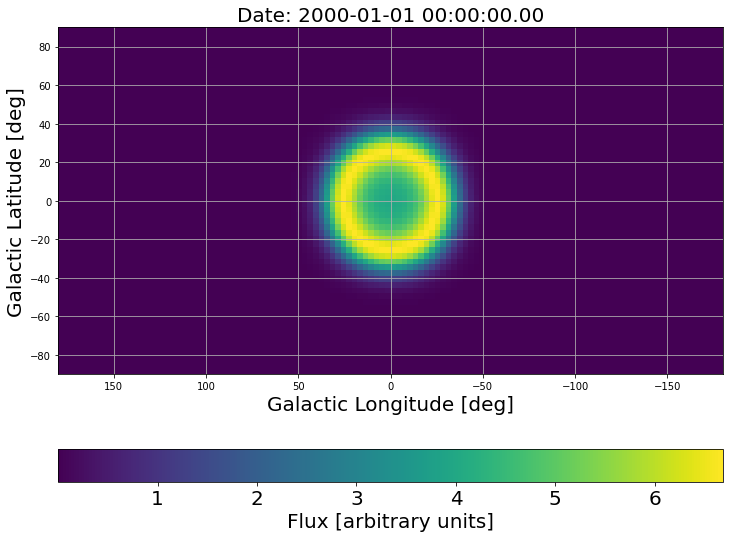

In [59]:
sph_new.los_source()
sph_new.plot_source()

<h3>Back to the new object:<br>
    We now have a class called "New_Function" which is of type "los" that requires init, density_function, and luminosity_function. Right now they are undefined:</h3>

In [60]:
new = New_Function(xT=100,yT=100,zT=10,Re=10,rho0=1)

<h3>The object can still be defined, though, but we cannot work with it because the density_function is not defined in the density_function.py file:</h3>

In [61]:
new.los_source()

NameError: name 'New_Density_Function' is not defined

<h3>Thus, we need to create it. We do it here in the notebook first for testing:</h3>

In [62]:
# here we define the function without numba (see actual code in density_functions.py)
#
# the density functions should always have the same shape with
# s,b,l,ds (numerical integration setup)
# x0,y0,z0 (position of the observer)
# xT,yT,zT (position of the source)
# all other parameters required
# flag for calculating the flux or the luminosity (boolean)

from numpy import pi, sin, cos, exp, sqrt

def New_Density_Function(s,b,l,
                         ds,
                         x0,y0,z0,
                         xT,yT,zT,
                         Re,
                         luminosity_flag):

    deg2rad = pi/180.

    # los vector
    x = x0 + s*cos(deg2rad*l)*cos(deg2rad*b)
    y = y0 + s*sin(deg2rad*l)*cos(deg2rad*b)
    z = z0 + s*sin(deg2rad*b)

    Rxyz = sqrt((x-xT)**2 + (y-yT)**2 + (z-zT)**2)

    # complete thing
    slices = exp(-Rxyz/Re)

    if luminosity_flag == False:
    
        # for map integration
        map_slices = slices

    else:

        # for luminosity integration
        map_slices = slices * s**2
    
    # los
    val = np.sum(map_slices*ds,axis=0)
    
    return(val)

<h3>There is a lot of overhead, but that's actually all we need to do. Now let's see how this works out:</h3>

In [63]:
new = New_Function(xT=100,yT=100,zT=10,Re=10,rho0=1,frame='G')

In [64]:
new.los_source()

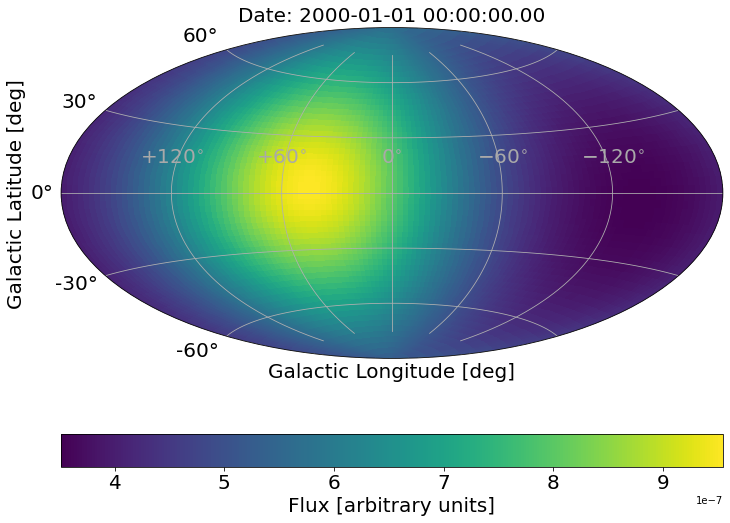

In [65]:
new.plot_source(projection='aitoff')

<h3>Looks suspicious? Yes, there is a default value for the numerical integration setup. We need to set it properly for our case:</h3>

In [66]:
# default values
new._smin,new._smax,new._n_los_steps

(0, 10, 400)

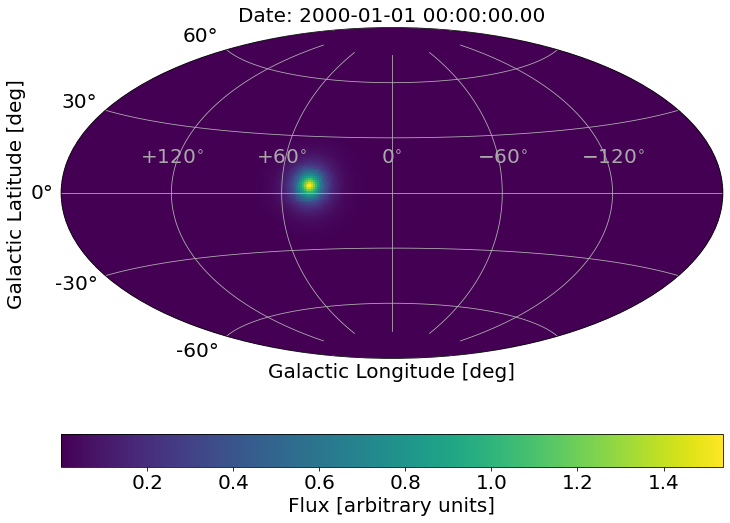

In [67]:
new = New_Function(xT=100,yT=100,zT=10,Re=10,rho0=1,
                   frame='G',
                   smin=0,smax=500,n_los_steps=1000,pixelsize=1)
new.los_source()
new.plot_source(projection='aitoff',)

In [68]:
new.flux,new.luminosity

(0.10171592880371032, 25132.244163852185)

<h3>Now we can also add properties to our new class, such as calculating the radius at which 50% of the light is included (this is a random thing I do for the purpose of showing how properties work):</h3>

In [69]:
class New_Function(los):
    """
    Explanation of the New Function.
    Input parameters:
    xT: x-coordinate of centre ...
    yT: y-coordinate of centre ...
    zT: z-coordinate of centre ...
    Re: Scale radius of exponential ...
    rho0: normalisation (so far unitless)

    """

    def __init__(self,**kwargs):
        
        super().__init__(**kwargs)
        
        self.name = 'New_Function'

        self.nls = num_los_setup(smin=self._smin,
                                 smax=self._smax,
                                 n_los_steps=self._n_los_steps,
                                 lmin=self._phi_min,
                                 lmax=self._phi_max,
                                 bmin=self._theta_min,
                                 bmax=self._theta_max,
                                 pixelsize=self._pixelsize)

        
        Re = kwargs.pop('Re')
        
        xT = kwargs.pop('xT')
        yT = kwargs.pop('yT')
        zT = kwargs.pop('zT')

        rho0 = kwargs.pop('rho0')
        
        self._params = [xT,yT,zT,Re]
        self._amplitude = rho0
        
        
    def density_function(self,_x,_y,_z,luminosity_flag=False,**kwargs):
        
        new_func = New_Density_Function(self.nls._grid_s,
                                        self.nls._grid_b,
                                        self.nls._grid_l,
                                        self.nls._ds,
                                        _x,_y,_z,
                                        *self._params,
                                        luminosity_flag)

        return self._amplitude * new_func

    
    def luminosity_function(self,_x,_y,_z,luminosity_flag=True,**kwargs):

        return self.density_function(_x,_y,_z,luminosity_flag=luminosity_flag,**kwargs)
    
    
    @property
    def light_within_scale_radius(self):
        if not hasattr(self, '_light_within_scale_radius'):

            # need to figure out where peak is in map
            # azimuth from xT and yT
            # only works in galactic coordinates now!
            dx = (self._params[0]-0)
            dy = (self._params[1]-0)
            dz = (self._params[2]-0)
            Rxy = sqrt(dx**2 + dy**2)
            Rxyz = sqrt(dx**2 + dy**2 + dz**2)
            azi = np.arccos(dx/Rxy)
            zen = np.arccos(dz/Rxyz)

            projected_radius = np.arctan2(self._params[-1],Rxyz)
            
            print(np.rad2deg(azi),90-np.rad2deg(zen),np.rad2deg(projected_radius))

            self._light_within_scale_radius = self.flux_in_circular_region(np.rad2deg(azi),
                                                                           90-np.rad2deg(zen),
                                                                           np.rad2deg(projected_radius))

            return self._light_within_scale_radius
        else:
            return self._light_within_scale_radius
            

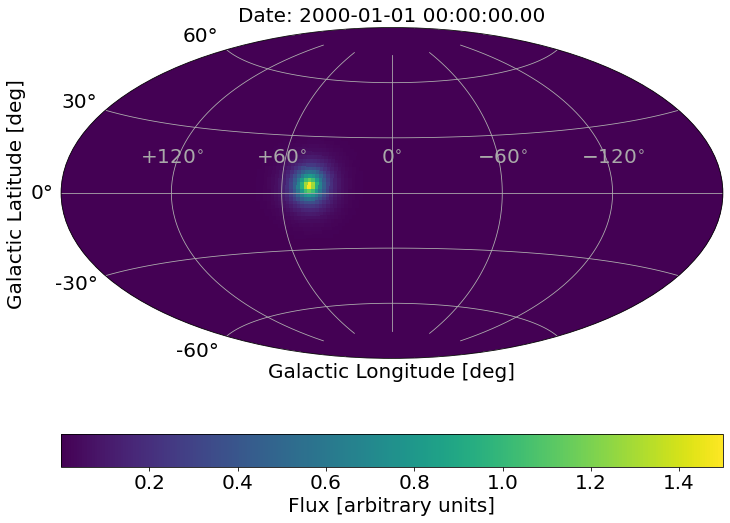

In [70]:
new = New_Function(xT=100,yT=100,zT=10,Re=10,rho0=1,
                   frame='G',
                   smin=0,smax=500,n_los_steps=1000,pixelsize=2)
new.los_source()
new.plot_source(projection='aitoff')

In [71]:
new.light_within_scale_radius

45.00000000000001 4.044691235386267 4.034650579696891


0.017627518681781147

In [72]:
new.flux

0.10170991931834505